## Name : Adwaiy Singh
## Reg. No. : 220968424
## Sec. : A
## Batch: 2

# Week 3
## Linear and MultiLinear Regression

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [11]:
df = pd.read_csv("../data/AirQualityUCI.csv", delimiter=';')
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df = df.iloc[:, 2:-2]

In [13]:
print(df.shape)
df = df.dropna()
print(df.shape)

(9471, 13)
(9357, 13)


In [14]:
df = df.apply(pd.to_numeric, errors='coerce')
df.dtypes

CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

In [15]:
def removeOutliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3  = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df_low = Q1 - 1.5*IQR
    df_hi = Q3 + 1.5*IQR
    new_df = df[(df[col] < df_hi) & (df[col] > df_low)].reset_index(drop=True)
    return new_df

x = removeOutliers(df, 'PT08.S4(NO2)')
y = removeOutliers(df, 'PT08.S5(O3)')

In [16]:
df.dropna()
print(df.shape)

(9357, 13)


In [17]:
x = df[['PT08.S4(NO2)']]
y = df[['PT08.S5(O3)']]

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [19]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(6549, 1) (2808, 1) (6549, 1) (2808, 1)


In [20]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [21]:
print(reg.coef_)
print(reg.intercept_)

[[0.70959635]]
[-12.72058017]


In [22]:
x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
y_pred = reg.predict(x_range)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


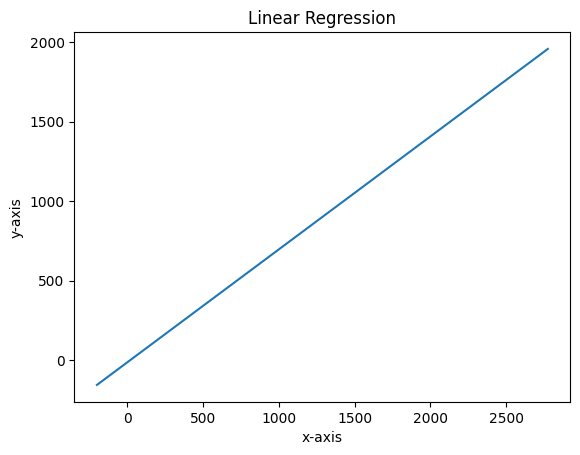

In [23]:
# plt.scatter(x, y)
plt.plot(x_range, y_pred)

plt.title("Linear Regression")
plt.ylabel("y-axis")
plt.xlabel("x-axis")

plt.show()

In [24]:
y_pred = reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r = r2_score(y_test, y_pred)
print(mse)
print(r)

102133.13897930268
0.5060790384626009


In [25]:
df['PT08.S4(NO2)'].corr(df['PT08.S5(O3)'])

0.7236903095500872

In [26]:
df.shape

(9357, 13)

In [27]:
df.dropna()
print(df.shape)

(9357, 13)


In [28]:
x1 = np.column_stack((df[['PT08.S1(CO)']], df[['PT08.S2(NMHC)']], df[['NOx(GT)']], df[['PT08.S3(NOx)']], df[['NO2(GT)']], df[['PT08.S4(NO2)']], df[['PT08.S5(O3)']]))
y1 = df[['NMHC(GT)']]

In [29]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=0)

In [30]:
print(x1_train.shape, x1_test.shape, y1_train.shape, y1_test.shape)

(6549, 7) (2808, 7) (6549, 1) (2808, 1)


In [31]:
reg1 = LinearRegression()
reg1.fit(x1_train, y1_train)

LinearRegression()

In [32]:
print(reg1.coef_)
print(reg1.intercept_)

[[ 0.2547739  -0.22165021 -0.15927846 -0.05826085  0.37791828  0.06672216
  -0.02840605]]
[-241.48475023]


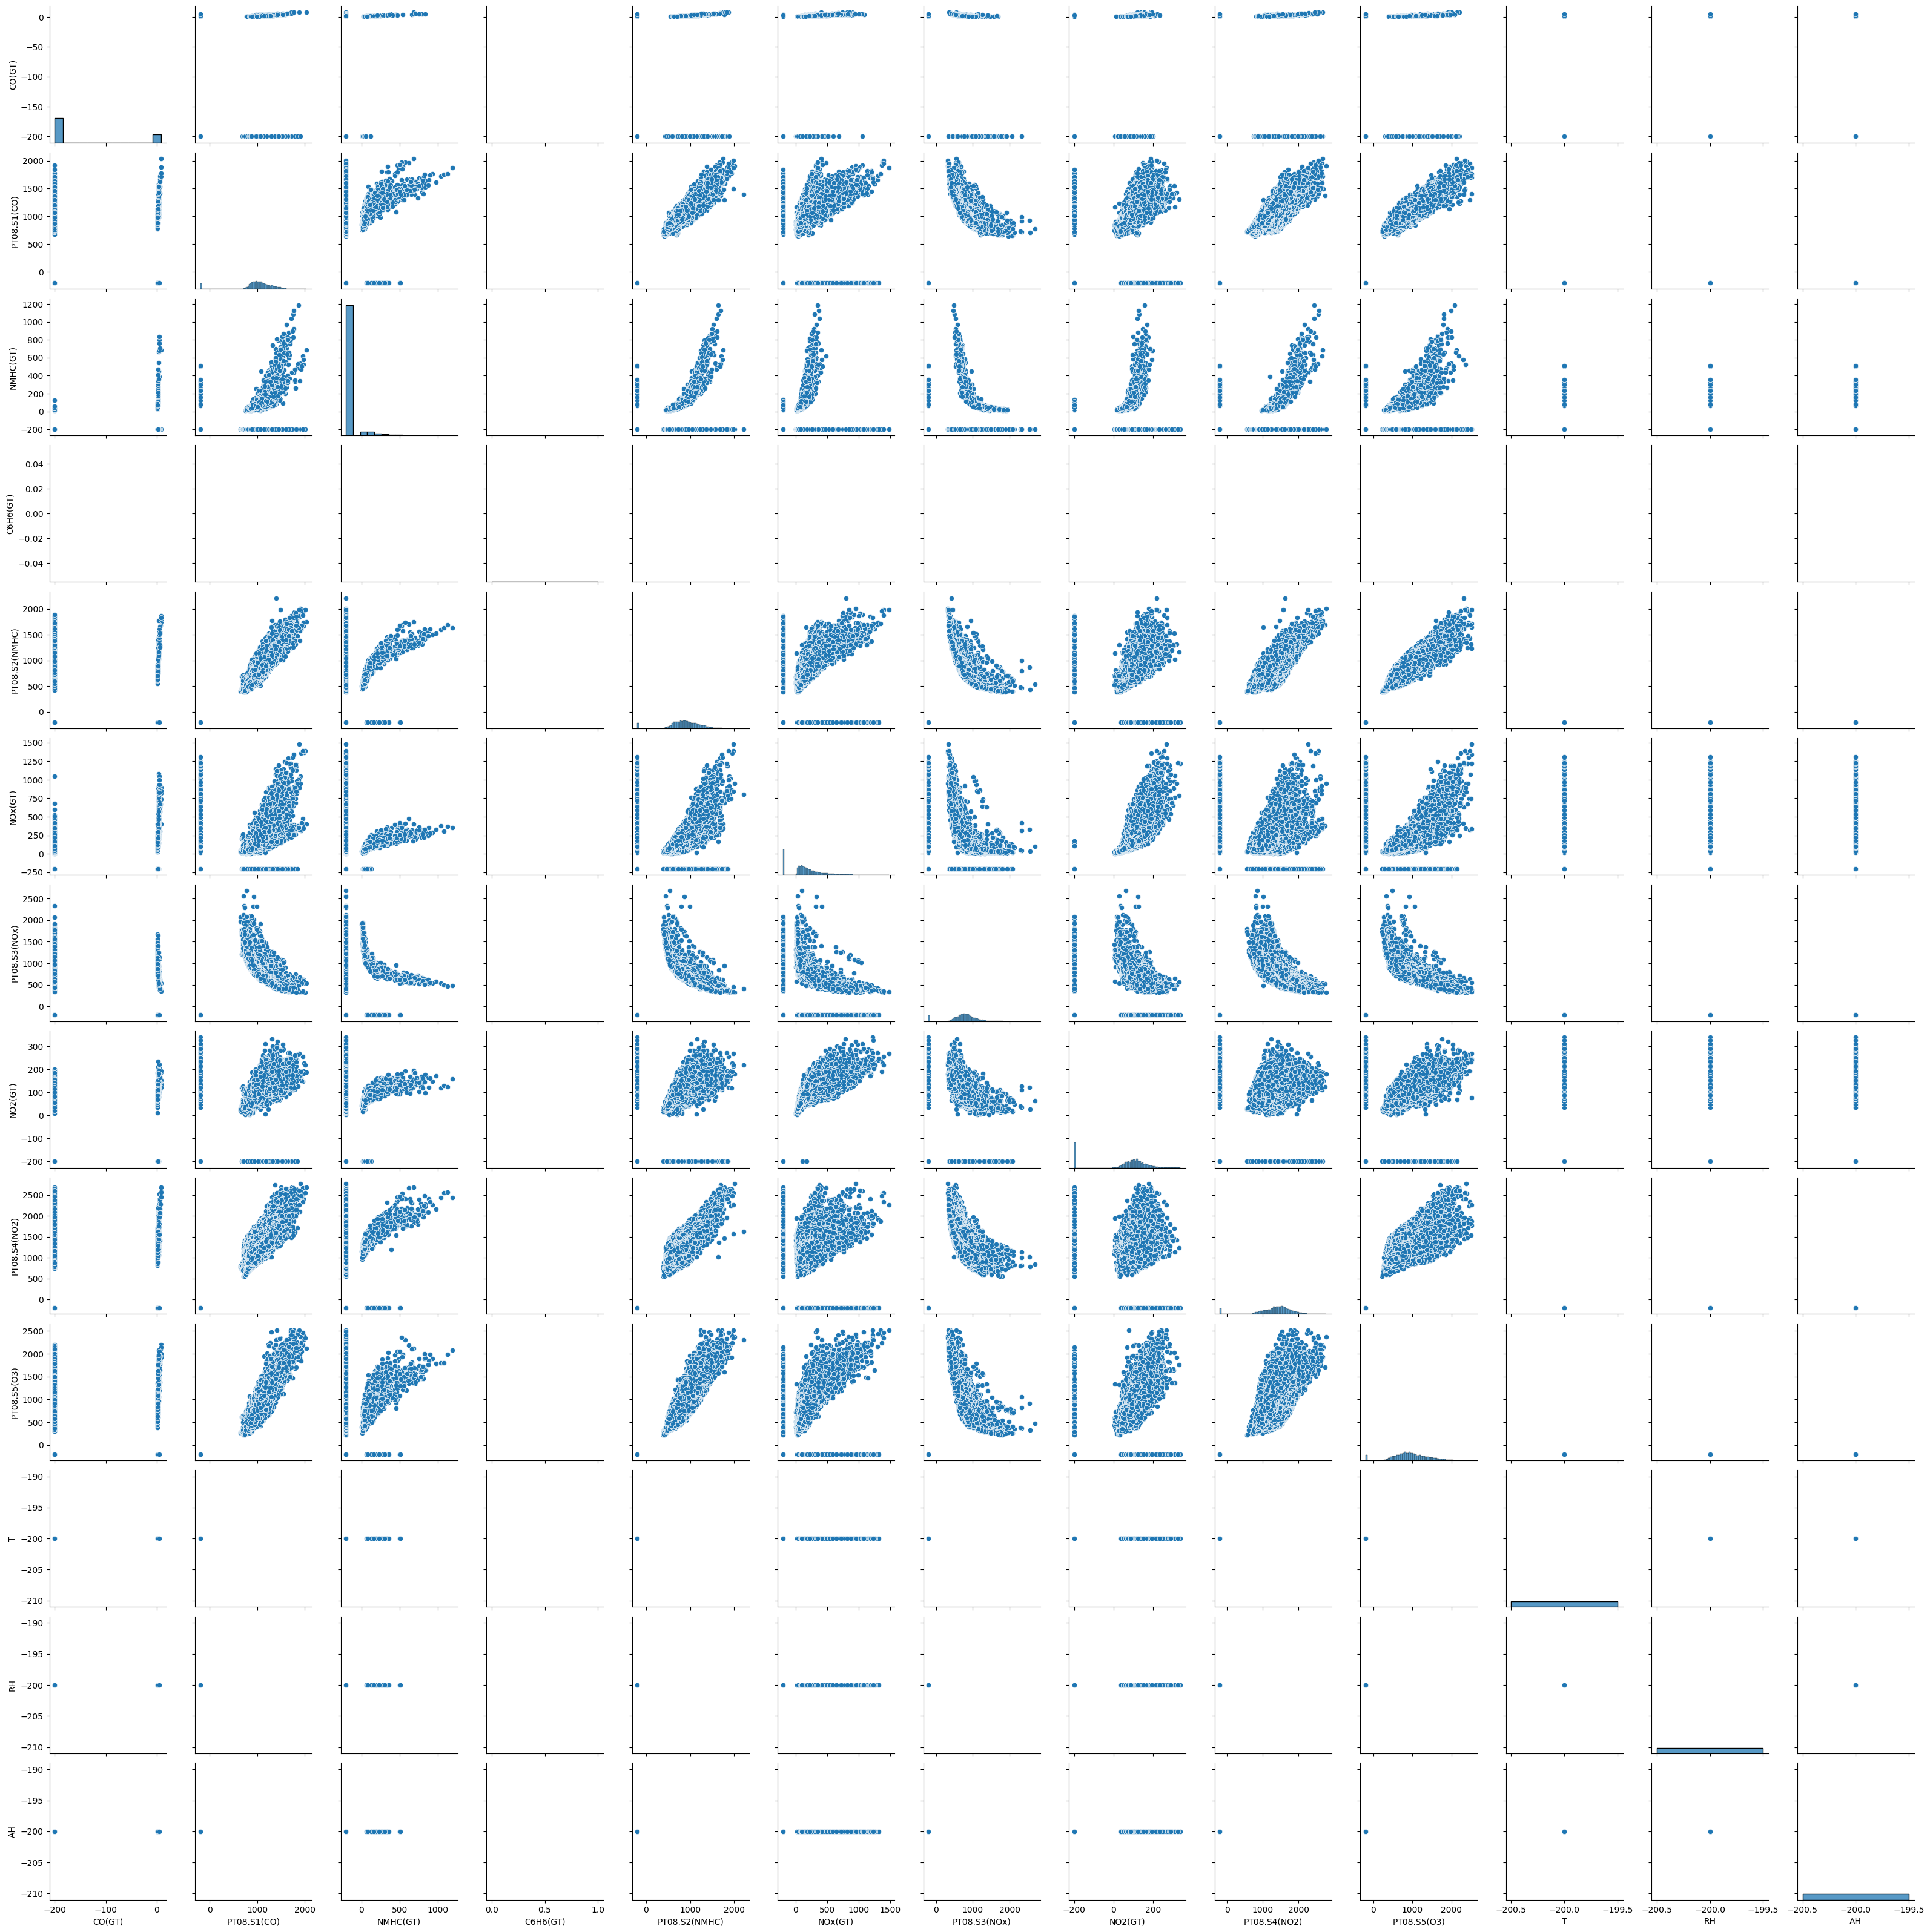

In [33]:
sns.pairplot(df)

In [34]:
y1_pred = reg1.predict(x1_test)

mse1 = mean_squared_error(y1_test, y1_pred)
r1 = r2_score(y1_test, y1_pred)
print(mse1)
print(r1)

16849.100072674322
0.10829709062890536
